# Model Inference  
# Phase 1 Milestone 1
    Name        : Pratama Waskito Prihandana
    class       : batch 003

______

# I. Importing Library

In [12]:
import pickle
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings("ignore")

# II. Load Model

In [13]:
with open('model_scaler.pkl', 'rb') as file_1:
    model_scaler = pickle.load(file_1)
    
with open('model_svm.pkl', 'rb') as file_2:
    model_svm = pickle.load(file_2)
    
with open('model_dt.pkl', 'rb') as file_3:
    model_dt = pickle.load(file_3)
    
with open('model_rf.pkl', 'rb') as file_4:
    model_rf = pickle.load(file_4)
    
with open('model_logreg.pkl', 'rb') as file_5:
    model_logreg = pickle.load(file_5)
    
with open('model_gnb.pkl', 'rb') as file_6:
    model_gnb = pickle.load(file_6)
            
with open('model_knn.pkl', 'rb') as file_7:
    model_knn = pickle.load(file_7)

# III. Load Data Inference

In [14]:
df = pd.read_csv('xdata_inference_p1m1.csv')

In [15]:
df.head()

,Unnamed: 0,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,limit_balance,default_payment
0,0,3.0,4.0,-2.0,-2.0,7.0,2.0,259446.697714,1
1,1,-2.0,7.0,-1.0,-1.0,4.0,0.0,721207.725948,1
2,2,-1.0,7.0,3.0,6.0,4.0,6.0,426709.596758,0
3,3,4.0,7.0,7.0,4.0,7.0,3.0,212664.155139,0
4,4,-2.0,6.0,-2.0,6.0,6.0,-2.0,668520.172663,1


In [16]:
# Drop unwanted column
df = df.drop(columns='Unnamed: 0', axis=1)

In [17]:
df.head()

,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,limit_balance,default_payment
0,3.0,4.0,-2.0,-2.0,7.0,2.0,259446.697714,1
1,-2.0,7.0,-1.0,-1.0,4.0,0.0,721207.725948,1
2,-1.0,7.0,3.0,6.0,4.0,6.0,426709.596758,0
3,4.0,7.0,7.0,4.0,7.0,3.0,212664.155139,0
4,-2.0,6.0,-2.0,6.0,6.0,-2.0,668520.172663,1


# IV. Feature Scaling

In [18]:
# create backup
df_pred = df

# scaling numerical only
num_scaled = pd.DataFrame(model_scaler.transform(df[['limit_balance']]), columns=df[['limit_balance']].columns.tolist())

#concatenate column
df_pred = np.concatenate([df[['pay_0', 'pay_2', 'pay_3', 'pay_4', 'pay_5', 'pay_6']], num_scaled], axis=1)

# V. Model Implementation

In [19]:
# SVM prediciton
svm_pred = pd.DataFrame(model_svm.predict(df_pred), columns=['svm_pred'])

# Decision tree prediction
dt_pred = pd.DataFrame(model_dt.predict(df_pred), columns=['decision_tree_pred'])

# random forest
rf_pred = pd.DataFrame(model_rf.predict(df_pred), columns=['random_forest_pred'])

# logistic regression
logreg_pred = pd.DataFrame(model_logreg.predict(df_pred), columns=['logistic_regression_pred'])

# Gaussian Naive Bayes
gnb_pred = pd.DataFrame(model_gnb.predict(df_pred), columns=['naive_bayes_pred'])

# K-Nearest neighbor
knn_pred = pd.DataFrame(model_knn.predict(df_pred), columns=['knn_pred'])

In [20]:
# Concatenate prediction result to dataframe
pred_result = pd.concat([df, svm_pred, dt_pred, rf_pred, logreg_pred, gnb_pred, knn_pred], axis=1)
pred_result.head()

,pay_0,pay_2,pay_3,pay_4,pay_5,pay_6,limit_balance,default_payment,svm_pred,decision_tree_pred,random_forest_pred,logistic_regression_pred,naive_bayes_pred,knn_pred
0,3.0,4.0,-2.0,-2.0,7.0,2.0,259446.697714,1,0,1,1,1,1,1
1,-2.0,7.0,-1.0,-1.0,4.0,0.0,721207.725948,1,0,0,0,0,1,0
2,-1.0,7.0,3.0,6.0,4.0,6.0,426709.596758,0,0,0,0,0,1,1
3,4.0,7.0,7.0,4.0,7.0,3.0,212664.155139,0,0,1,1,1,1,1
4,-2.0,6.0,-2.0,6.0,6.0,-2.0,668520.172663,1,0,0,0,0,1,0


<AxesSubplot: xlabel='count', ylabel='logistic_regression_pred'>

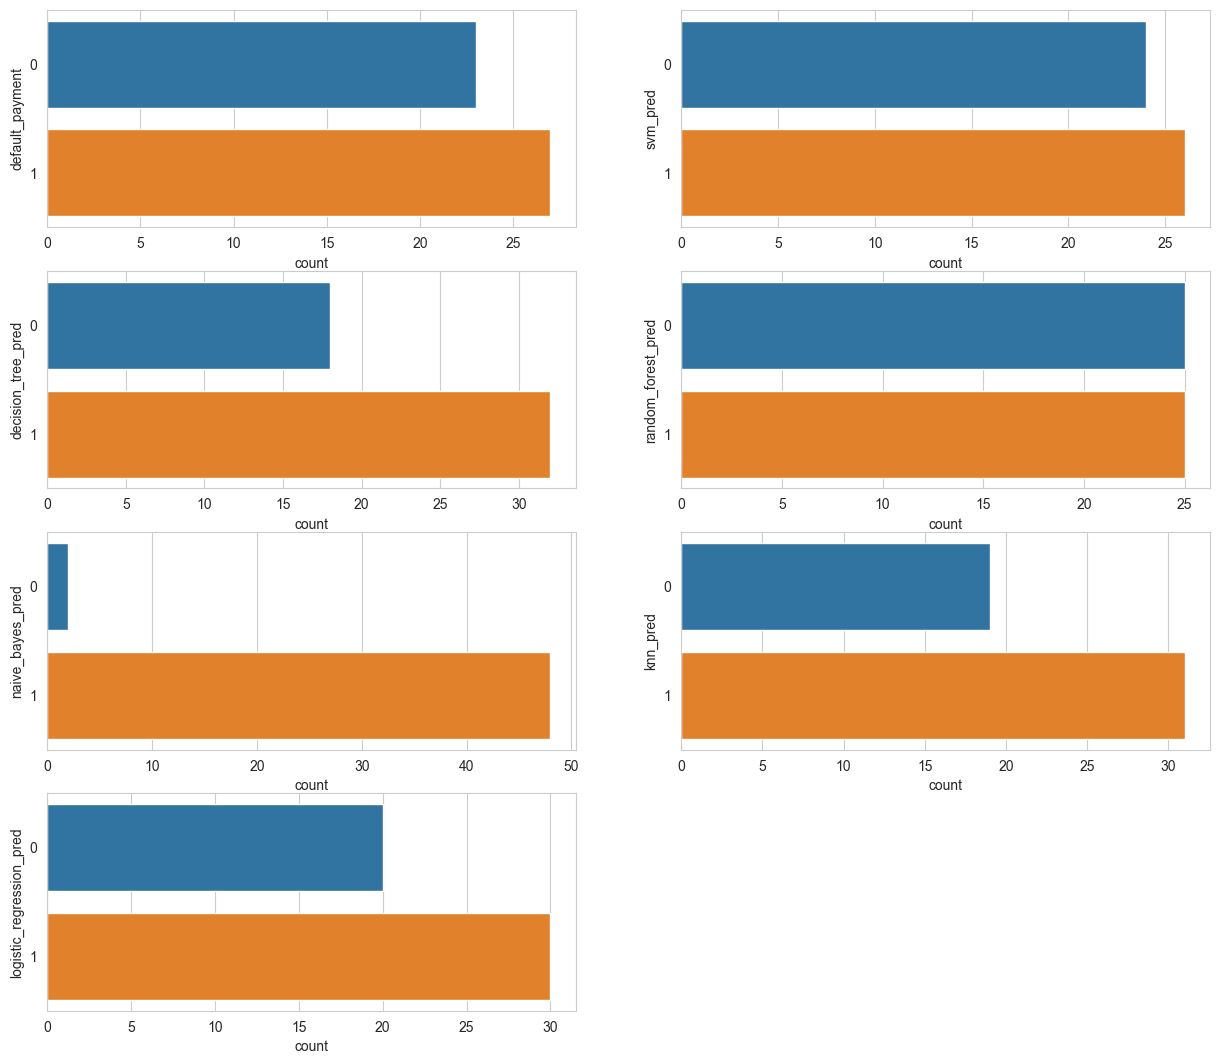

In [21]:
plt.figure(figsize=(15,13))

plt.subplot(421)
sns.set_style("whitegrid")
sns.countplot(y='default_payment', data=pred_result)

plt.subplot(422)
sns.set_style("whitegrid")
sns.countplot(y='svm_pred', data=pred_result)

plt.subplot(423)
sns.set_style("whitegrid")
sns.countplot(y='decision_tree_pred', data=pred_result)

plt.subplot(424)
sns.set_style("whitegrid")
sns.countplot(y='random_forest_pred', data=pred_result)

plt.subplot(425)
sns.set_style("whitegrid")
sns.countplot(y='naive_bayes_pred', data=pred_result)

plt.subplot(426)
sns.set_style("whitegrid")
sns.countplot(y='knn_pred', data=pred_result)

plt.subplot(427)
sns.set_style("whitegrid")
sns.countplot(y='logistic_regression_pred', data=pred_result)

Text(0.5, 1.4, 'Prediction Model Using Random Forest')

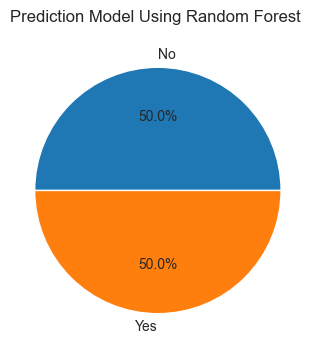

In [22]:
# default count
plt.figure(figsize=(2,2))

plt.pie(pred_result['random_forest_pred'].value_counts(),labels=['No','Yes'],autopct='%0.1f%%',radius=2)
plt.suptitle("Prediction Model Using Random Forest", y=1.4)